In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.preprocessing import OneHotEncoder

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize

In [4]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11493376/11490434 [==============================] - 43s 4us/step


In [5]:
trainX.shape

(60000, 28, 28)

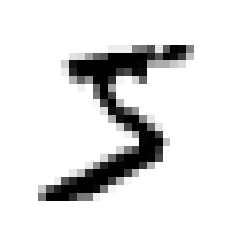

In [6]:
some_digit = trainX[0]
plt.imshow(some_digit, cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [7]:
## Preprocessing Your Data

In [8]:
trainX = normalize(trainX)
testX = normalize(testX)

In [9]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [10]:
#### WithOut DropOut

In [11]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(784, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
H = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_split=0.2)

Epoch 1/10
960/960 [==============================] - 4s 4ms/step - loss: 0.2685 - accuracy: 0.9215 - val_loss: 0.1330 - val_accuracy: 0.9607
Epoch 2/10
960/960 [==============================] - 3s 3ms/step - loss: 0.1060 - accuracy: 0.9674 - val_loss: 0.0942 - val_accuracy: 0.9722
Epoch 3/10
960/960 [==============================] - 3s 3ms/step - loss: 0.0681 - accuracy: 0.9799 - val_loss: 0.0883 - val_accuracy: 0.9736
Epoch 4/10
960/960 [==============================] - 3s 3ms/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0851 - val_accuracy: 0.9738
Epoch 5/10
960/960 [==============================] - 3s 3ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0828 - val_accuracy: 0.9754
Epoch 6/10
960/960 [==============================] - 3s 3ms/step - loss: 0.0250 - accuracy: 0.9926 - val_loss: 0.0787 - val_accuracy: 0.9774
Epoch 7/10
960/960 [==============================] - 3s 4ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0953 - val_accuracy: 0.9747
Epoch 

In [15]:
H.history

{'loss': [0.26852065324783325,
  0.10597924143075943,
  0.06806273013353348,
  0.04720791056752205,
  0.03441539779305458,
  0.02504502795636654,
  0.017449021339416504,
  0.014164839871227741,
  0.010828694328665733,
  0.009244678542017937],
 'accuracy': [0.9215208292007446,
  0.9674375057220459,
  0.9799166917800903,
  0.9857916831970215,
  0.9897291660308838,
  0.9925833344459534,
  0.9949374794960022,
  0.9958124756813049,
  0.9968958497047424,
  0.9973958134651184],
 'val_loss': [0.13296537101268768,
  0.0942249745130539,
  0.08826249092817307,
  0.08505170047283173,
  0.08283681422472,
  0.07868194580078125,
  0.09530328214168549,
  0.09011415392160416,
  0.08434473723173141,
  0.10035290569067001],
 'val_accuracy': [0.9607499837875366,
  0.9722499847412109,
  0.9735833406448364,
  0.9738333225250244,
  0.9754166603088379,
  0.9774166941642761,
  0.9746666550636292,
  0.9763333201408386,
  0.9794999957084656,
  0.9753333330154419]}

In [16]:
acc = H.history["accuracy"]
val_acc = H.history["val_accuracy"]
loss = H.history["loss"]
val_loss = H.history["val_loss"]
n = np.arange(1,11)

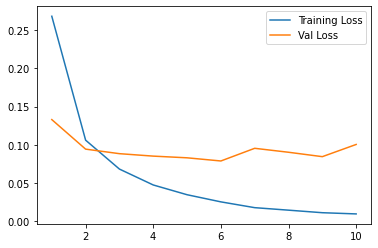

In [17]:
plt.plot(n, loss, label = "Training Loss")
plt.plot(n, val_loss, label = "Val Loss")
plt.legend()
plt.show()

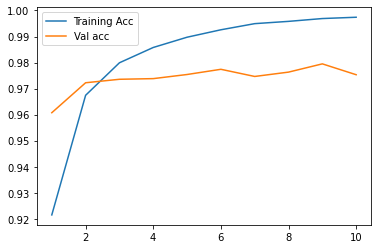

In [18]:
plt.plot(n, acc, label = "Training Acc")
plt.plot(n, val_acc, label = "Val acc")
plt.legend()
plt.show()

In [19]:
### Dropout Layer Network

In [20]:
model = Sequential()

In [21]:
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(784, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(130, activation="relu"))
model.add(Dropout(0.4))

##o/p layer
model.add(Dense(10, activation="softmax"))



In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
H = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_split=0.2)

Epoch 1/10
960/960 [==============================] - 4s 4ms/step - loss: 0.3423 - accuracy: 0.8936 - val_loss: 0.1365 - val_accuracy: 0.9595
Epoch 2/10
960/960 [==============================] - 4s 4ms/step - loss: 0.1572 - accuracy: 0.9537 - val_loss: 0.1063 - val_accuracy: 0.9655
Epoch 3/10
960/960 [==============================] - 4s 4ms/step - loss: 0.1218 - accuracy: 0.9633 - val_loss: 0.1047 - val_accuracy: 0.9684
Epoch 4/10
960/960 [==============================] - 4s 4ms/step - loss: 0.1030 - accuracy: 0.9683 - val_loss: 0.0841 - val_accuracy: 0.9755
Epoch 5/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0829 - accuracy: 0.9744 - val_loss: 0.0799 - val_accuracy: 0.9763
Epoch 6/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0767 - accuracy: 0.9760 - val_loss: 0.0812 - val_accuracy: 0.9768
Epoch 7/10
960/960 [==============================] - 4s 5ms/step - loss: 0.0661 - accuracy: 0.9799 - val_loss: 0.0894 - val_accuracy: 0.9737
Epoch 

In [23]:
acc = H.history["accuracy"]
val_acc = H.history["val_accuracy"]
loss = H.history["loss"]
val_loss = H.history["val_loss"]
n = np.arange(1,11)

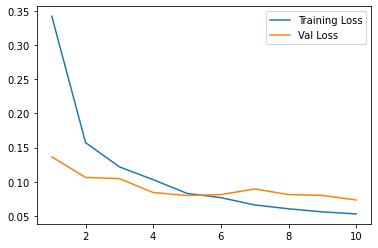

In [24]:
plt.plot(n, loss, label = "Training Loss")
plt.plot(n, val_loss, label = "Val Loss")
plt.legend()
plt.show()

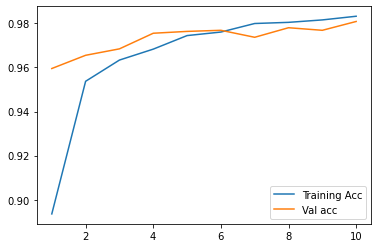

In [25]:
plt.plot(n, acc, label = "Training Acc")
plt.plot(n, val_acc, label = "Val acc")
plt.legend()
plt.show()

In [26]:
model.predict_classes(testX[0:1])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7], dtype=int64)

In [27]:
testY[0:1].argmax()

7

In [28]:
model.save("mnist_with_dropout.h5")

In [29]:
ls

 Volume in drive E has no label.
 Volume Serial Number is D49E-A32D

 Directory of E:\MLOps\mlops

30-09-2020  06:54    <DIR>          .
30-09-2020  06:54    <DIR>          ..
20-08-2020  06:23                42 .gitignore
24-09-2020  06:43    <DIR>          .ipynb_checkpoints
07-09-2020  13:15            45,029 1. Basic Python with NumPy.ipynb
12-09-2020  06:28           514,830 10. KNN - From Scratch & Play with Hand Written Digits...ipynb
16-09-2020  06:33            14,616 11. Hand Written Digit Classification (1).ipynb
11-09-2020  21:18            68,422 12. Movie Recommendation System .ipynb
14-09-2020  06:49            52,859 13 Naive Bayes - With Python.ipynb
16-09-2020  06:31            35,010 14 K-Mean from Scratch with IRIS And MNIST.ipynb
16-09-2020  06:36            50,707 15 Mall Customer Seg..ipynb
16-09-2020  08:43            89,985 16 Customer Clustering (K-Mean) -RFM.ipynb
17-09-2020  12:16            87,782 16 Customer Clustering (K-Means) - RFM (1).ipynb
23-09-2020 

In [32]:
!pip install google.colab
from google.colab import drive

  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\anshu\appdata\local\programs\python\python38\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\anshu\\AppData\\Local\\Temp\\pip-install-9v6hbxc2\\pandas\\setup.py'"'"'; __file__='"'"'C:\\Users\\anshu\\AppData\\Local\\Temp\\pip-install-9v6hbxc2\\pandas\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\anshu\AppData\Local\Temp\pip-wheel-ypv_20u4'
       cwd: C:\Users\anshu\AppData\Local\Temp\pip-install-9v6hbxc2\pandas\
  Complete output (841 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.8\pandas
  copying pandas\testing.py -> build\lib.win-amd64-3.8\pandas
  copying pandas

ModuleNotFoundError: No module named 'google.colab'

  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102298 sha256=4ce2350788e810209160f77ba9a281f75d7d009d9b2239e2ee8c3106de0c43a8
  Stored in directory: c:\users\anshu\appdata\local\pip\cache\wheels\e4\e7\91\b2736701bca00e273fdc79f80e2727b558e0903d81b758eb69
  Running setup.py clean for pandas

  creating build\lib.win-amd64-3.8\pandas\errors
  copying pandas\errors\__init__.py -> build\lib.win-amd64-3.8\pandas\errors
  creating build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\api.py -> build\lib.win-amd64-3.8\pandas\io


  Created wheel for portpicker: filename=portpicker-1.2.0-py3-none-any.whl size=13371 sha256=9e3cfa7706d759afe3f630b38201cdbf4e7c735c5cde71c7c57788746995c9eb
  Stored in directory: c:\users\anshu\appdata\local\pip\cache\wheels\b9\10\77\cad2fb4f8ab57cc7cecb92b9b1b0548ac932b8f81774003683
  Created wheel for tornado: filename=tornado-4.5.3-cp38-cp38-win_amd64.whl size=420777 sha256=bdc6c2988d459e98be6b983ab25461e84e0c1368d75035cf0c67b6eba8a65982
  Stored in directory: c:\users\anshu\appdata\local\pip\cache\wheels\20\fe\26\0c03adccd0cec2744261ec6b8380fbe5e726d1ea4cf3a9370e
  Created wheel for simplegeneric: filename=simplegeneric-0.8.1-py3-none-any.whl size=5078 sha256=d2b81f3e81817325d7b25f81455a81e7974e6abd66ac48fee8f667a2ece6ad46
  Stored in directory: c:\users\anshu\appdata\local\pip\cache\wheels\0b\32\6b\5f5447909a062da20dfe432fa945d8f98636692637deccaa8a
Successfully built google.colab portpicker tornado simplegeneric
Failed to build pandas
  Attempting uninstall: six
    Found exist


  copying pandas\io\clipboards.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\common.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\date_converters.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\excel.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\feather_format.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\gbq.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\gcs.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\html.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\packers.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\parquet.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\parsers.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\pickle.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\pytables.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\s3.py -> build\lib.win-amd64-3.8\pandas\io
  copying pandas\io\sql.py -> build\lib.win-amd6

In [ ]:
drive.mount("/content/drive")

In [ ]:
ls

In [ ]:
cd drive/

In [ ]:
ls

In [ ]:
cd My\ Drive/

In [ ]:
model.save("mnist_with_dropout.hdf5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("mnist_with_dropout.h5")

In [ ]:
model.predict_classes(testX[0:1])

In [ ]:
ls


  creating build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\api.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\converter.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\frequencies.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\holiday.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\offsets.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\plotting.py -> build\lib.win-amd64-3.8\pandas\tseries
  copying pandas\tseries\__init__.py -> build\lib.win-amd64-3.8\pandas\tseries
  creating build\lib.win-amd64-3.8\pandas\util
  copying pandas\util\testing.py -> build\lib.win-amd64-3.8\pandas\util
  copying pandas\util\_decorators.py -> build\lib.win-amd64-3.8\pandas\util
  copying pandas\util\_depr_module.py -> build\lib.win-amd64-3.8\pandas\util
  copying pandas\util\_doctools.py -> build\lib.win-amd64-3.8\pandas\util
  copying pandas\util\_exceptions.py -> build\lib.win

### **Save Your Best Model Durinng Training Time**

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [34]:
#file_path = "mnist_best_model.hdf5"
file_path = "mnist_best_model-{epoch:02d}--{val_accuracy:.2f}.hdf5"
checkPoint = ModelCheckpoint(file_path, monitor="val_accuracy",  save_best_only=True, mode = max)

In [35]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(784, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(130, activation="relu"))
model.add(Dropout(0.4))

##o/p layer
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
H = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_split=0.2, callbacks=[checkPoint])

Epoch 1/10
960/960 [==============================] - 4s 5ms/step - loss: 0.3499 - accuracy: 0.8927 - val_loss: 0.1330 - val_accuracy: 0.9579
Epoch 2/10
960/960 [==============================] - 4s 4ms/step - loss: 0.1573 - accuracy: 0.9534 - val_loss: 0.1021 - val_accuracy: 0.9678
Epoch 3/10
960/960 [==============================] - 4s 4ms/step - loss: 0.1214 - accuracy: 0.9626 - val_loss: 0.0885 - val_accuracy: 0.9722
Epoch 4/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0988 - accuracy: 0.9706 - val_loss: 0.0883 - val_accuracy: 0.9725
Epoch 5/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0841 - accuracy: 0.9745 - val_loss: 0.0842 - val_accuracy: 0.9758
Epoch 6/10
960/960 [==============================] - 4s 4ms/step - loss: 0.0760 - accuracy: 0.9768 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 7/10
960/960 [==============================] - 4s 5ms/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0849 - val_accuracy: 0.9756
Epoch 

In [36]:
ls

 Volume in drive E has no label.
 Volume Serial Number is D49E-A32D

 Directory of E:\MLOps\mlops

30-09-2020  07:02    <DIR>          .
30-09-2020  07:02    <DIR>          ..
20-08-2020  06:23                42 .gitignore
30-09-2020  07:00    <DIR>          .ipynb_checkpoints
07-09-2020  13:15            45,029 1. Basic Python with NumPy.ipynb
12-09-2020  06:28           514,830 10. KNN - From Scratch & Play with Hand Written Digits...ipynb
16-09-2020  06:33            14,616 11. Hand Written Digit Classification (1).ipynb
11-09-2020  21:18            68,422 12. Movie Recommendation System .ipynb
14-09-2020  06:49            52,859 13 Naive Bayes - With Python.ipynb
16-09-2020  06:31            35,010 14 K-Mean from Scratch with IRIS And MNIST.ipynb
16-09-2020  06:36            50,707 15 Mall Customer Seg..ipynb
16-09-2020  08:43            89,985 16 Customer Clustering (K-Mean) -RFM.ipynb
17-09-2020  12:16            87,782 16 Customer Clustering (K-Means) - RFM (1).ipynb
23-09-2020 

In [37]:
### train your model with pre_trained_model

In [38]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(784, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(130, activation="relu"))
model.add(Dropout(0.4))

##o/p layer
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.load_weights("mnist_best_model.hdf5")
#H = model.fit(trainX, trainY, epochs=10, batch_size=50, validation_split=0.2, callbacks=[checkPoint])

OSError: Unable to open file (unable to open file: name = 'mnist_best_model.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
model.load_weights("mnist_best_model.hdf5")
model.weights

In [ ]:
model.summary()